In [11]:
# Dependancies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import gzip
from Bio import SeqIO
plt.rcParams['font.family'] = 'Arial'

In [12]:
# input directories
SR16s_dir = '../../pipes/SR16s_pipeline/a_readsConcat'
LR16sONT_dir = '../../pipes/LR16sONT_pipeline/a_readsConcat'
LR16sKAPA_dir = '../../pipes/LR16sKAPA_pipeline/a_readsConcat'
nopre_LRshot_dir = '../../pipes/LRshotgun_pipeline/a_readsConcat'
QC_LRshot_dir = '../../pipes/LRshotgun_pipeline/d_hqfiltered'
nopre_SRshot_dir = '../../pipes/SRshotgun_pipeline/a_readsConcat'
QC_SRshot_dir = '../../pipes/SRshotgun_pipeline/d_hqfiltered'

In [13]:
SR16s_samples = sorted(os.listdir(SR16s_dir))
LR16sONT_samples = sorted(os.listdir(LR16sONT_dir))
LR16sKAPA_samples = sorted(os.listdir(LR16sKAPA_dir))
nopre_LRshot_samples = sorted(os.listdir(nopre_LRshot_dir))
QC_LRshot_samples = sorted(os.listdir(QC_LRshot_dir))
nopre_SRshot_samples = sorted(os.listdir(nopre_SRshot_dir))
QC_SRshot_samples = sorted(os.listdir(QC_SRshot_dir))

In [14]:
directories = [SR16s_dir, LR16sONT_dir, LR16sKAPA_dir, nopre_LRshot_dir,
                QC_LRshot_dir, nopre_SRshot_dir, QC_SRshot_dir]

samplegroup_list = [SR16s_samples, LR16sONT_samples, LR16sKAPA_samples, nopre_LRshot_samples, 
                QC_LRshot_samples, nopre_SRshot_samples, QC_SRshot_samples]

samples = ['SR16s_mockA', 'SR16s_mockB', 'SR16s_mockC', 'SR16s_mockD', 'SR16s_mockE', 'SR16s_mockF',
           'LR16sONT_mockA', 'LR16sONT_mockB', 'LR16sONT_mockC', 'LR16sONT_mockD', 'LR16sONT_mockE', 'LR16sONT_mockF',
           'LR16sKAPA_mockA', 'LR16sKAPA_mockB', 'LR16sKAPA_mockC', 'LR16sKAPA_mockD', 'LR16sKAPA_mockE', 'LR16sKAPA_mockF',
           'nopre_LRshot_mockA', 'nopre_LRshot_mockB', 'nopre_LRshot_mockC', 'nopre_LRshot_mockD', 'nopre_LRshot_mockE', 'nopre_LRshot_mockF',
           'QC_LRshot_mockA', 'QC_LRshot_mockB', 'QC_LRshot_mockC', 'QC_LRshot_mockD', 'QC_LRshot_mockE', 'QC_LRshot_mockF',
           'nopre_SRshot_mockA', 'nopre_SRshot_mockB', 'nopre_SRshot_mockC', 'nopre_SRshot_mockE', 'nopre_SRshot_mockF',
           'QC_SRshot_mockA', 'QC_SRshot_mockB', 'QC_SRshot_mockC', 'QC_SRshot_mockE', 'QC_SRshot_mockF']

sample_paths = []

for idx, directory in enumerate(directories):
    for file in samplegroup_list[idx]:
        full_path = os.path.join(directory, file)
        if not file.startswith('.'):
            sample_paths.append(full_path)

In [15]:
# # time consuming, so only run if necessary

# for idx, sample_path in enumerate(sample_paths):
#     seq_lens = []
#     avg_quals = []
#     # if a gzip file, open with gzip.open
#     if sample_path.endswith('.gz'):
#         with gzip.open(sample_path, "rt") as input_file:
#             for record in SeqIO.parse(input_file, "fastq"):
#                 seq_lens.append(len(record.seq))
#                 avg_quals.append(np.mean(record.letter_annotations['phred_quality']))
#     # if not a gzip file, open with open
#     else:
#         with open(sample_path, "r") as input_file:
#             for record in SeqIO.parse(input_file, "fastq"):
#                 seq_lens.append(len(record.seq))
#                 avg_quals.append(np.mean(record.letter_annotations['phred_quality']))
#     # save the data named after its sample 'sample[idx]'
#     sample = samples[idx]
#     data = pd.DataFrame({'seq_len': seq_lens, 'avg_qual': avg_quals})
#     data.to_csv(f'seqsquals_data/{sample}_seqsquals.csv', index=False)

### Read data back in

In [22]:
# read data back in
data_dir = 'seqsquals_data'

data_files = sorted([file for file in os.listdir(data_dir) if file.endswith('.csv')])

# make a df for each file 
seqsquals_dfs = []
for file in data_files:
    df = pd.read_csv(os.path.join(data_dir, file))
    seqsquals_dfs.append(df)


In [60]:
# define which ranges in the list belong to which sequencing method

# print(seqsquals_dfs[:6]) # dfs 0 through 5 are LR16sKAPA
# print(len(seqsquals_dfs[:6])) 
# print(seqsquals_dfs[6:12]) # dfs 6 through 11 are LR16sONT
# print(len(seqsquals_dfs[6:12])) 
# print(seqsquals_dfs[12:18]) # dfs 12 through 17 are QC_LRshot
# print(len(seqsquals_dfs[12:18])) 
# print(seqsquals_dfs[18:23]) # dfs 18 through 22 are QC_SRshot
# print(len(seqsquals_dfs[18:23])) 
# print(seqsquals_dfs[23:29]) # dfs 23 through 29 are SR16s
# print(len(seqsquals_dfs[23:29])) 
# print(seqsquals_dfs[29:35]) # dfs 29 through 35 are nopre_LRshot
# print(len(seqsquals_dfs[29:35])) 
# print(seqsquals_dfs[35:]) # dfs 35 through 41 are nopre_SRshot
# print(len(seqsquals_dfs[35:]))

# key value list of seq type and ranges
seq_type_ranges = {'LR16sKAPA': seqsquals_dfs[:6], 'LR16sONT': seqsquals_dfs[6:12], 'QC_LRshot': seqsquals_dfs[12:18], 
                   'QC_SRshot': seqsquals_dfs[18:23], 'SR16s': seqsquals_dfs[23:29], 'nopre_LRshot': seqsquals_dfs[29:35], 
                   'nopre_SRshot': seqsquals_dfs[35:]}

### Visualise

In [154]:
def figure_1(ordered_df_list, title, legend_labels, face_colour_map, edge_colour_map,
             background_colour, plot_colour, font_colour, line_colour,
             plot_title1, x_title1, y_title1,
             plot_title2, x_title2, y_title2,
             plot_title3, x_title3, y_title3,
             plot_title4, x_title4, y_title4,
             plot_title5, x_title5, y_title5,
             plot_title6, x_title6, y_title6,
             plot_title7, x_title7, y_title7):
    
    x_figs = 2
    y_figs = 4
    fig, axs = plt.subplots(y_figs, x_figs, figsize=(14, 14))

    plot_types = ['histogram', 'blank', 
                  'scatter', 'scatter', 
                  'histogram', 'histogram',
                  'scatter', 'scatter']

    plot_titles = [plot_title1, '',
                   plot_title2, plot_title3, 
                   plot_title4, plot_title5, 
                   plot_title6, plot_title7]
    x_titles = [x_title1, '',
                x_title2, x_title3, 
                x_title4, x_title5, 
                x_title6, x_title7]
    y_titles = [y_title1, '',
                y_title2, y_title3, 
                y_title4, y_title5,
                y_title6, y_title7]
    histo_read_lengths = ['300 bp', '', '', '', 
                          '150 bp', '150 bp', '', '']
    histo_width_factor = [4, 1, 1, 1, 
                          16, 16, 1, 1]

    for i in range(y_figs):
        for j in range(x_figs):
            index = i * x_figs + j
            if index >= len(plot_types):
                # If we reach the end of plot_types, break the loop
                break
            
            plot_type = plot_types[index]
            df_list = ordered_df_list[index]
            this_data_legend_labels = legend_labels[index]
            
            if plot_type == 'histogram':
                for k, df in enumerate(df_list):
                    # determine bin parameters
                    min_val, q1, median, q3, max_val = np.percentile(df, [0, 25, 50, 75, 100])
                    iqr = q3 - q1
                    bin_width = histo_width_factor[index] * iqr / (len(df) ** (1/3))
                    num_bins = int((max_val - min_val) / bin_width)
                    # plot histogram
                    axs[i, j].hist(df['avg_qual'], bins=num_bins, alpha=0.5, 
                                   color=face_colour_map[this_data_legend_labels[k]], 
                                   edgecolor=edge_colour_map[this_data_legend_labels[k]])
                    axs[i, j].text(0.02, 0.95, f'Read Length: {histo_read_lengths[index]}',
                                   horizontalalignment='left', verticalalignment='top', 
                                   transform=axs[i, j].transAxes, color=font_colour)
                
            elif plot_type == 'scatter':
                for k, df in enumerate(df_list):
                    # plot scatter
                    axs[i, j].scatter(df['seq_len'], df['avg_qual'], alpha=0.5, 
                                      color=face_colour_map[this_data_legend_labels[k]], 
                                      edgecolor=edge_colour_map[this_data_legend_labels[k]])
                    axs[i, j].set_ylim(0, 80)
                
            elif plot_type == 'blank':
                axs[i, j].axis('off')
                
            # plot title and axis titles
            axs[i, j].set_title(plot_titles[index], fontsize=12, color=font_colour, fontweight='bold')
            axs[i, j].set_xlabel(x_titles[index], fontsize=10, color=font_colour)
            axs[i, j].set_ylabel(y_titles[index], fontsize=10, color=font_colour)
    
    # Aesthetics
    # Overall plot
    sub_fig_label = ['A)', '', 'B)', 'C)', 'D)', 'E)', 'F)', 'G)']
    fig.suptitle(title, fontweight='bold', fontsize=18, color=font_colour, y=0.935)
    plt.subplots_adjust(hspace=0.4)
    fig.set_facecolor(background_colour)
    spine_color = line_colour
    spine_linewidth = 1.2
    # legend
    legend = axs[0,0].legend(legend_labels[0], loc='upper left', fontsize=12, 
                             ncols=1, bbox_to_anchor=(1.4, 1.025), title='Mock Community Replicate', 
                             title_fontsize='14')
    legend.get_title().set_fontweight('bold')
    for text in legend.get_texts():
        text.set_color(font_colour)

    # iterate over sub plots
    for i, ax_row in enumerate(axs):
        for j, ax in enumerate(ax_row):
            ax.set_facecolor(plot_colour)
            for spine in ax.spines.values():
                spine.set_color(spine_color)
                spine.set_linewidth(spine_linewidth)
            ax.tick_params(axis='x', colors=line_colour)
            ax.tick_params(axis='y', colors=line_colour)
            ax.text(-0.1, 1.2, sub_fig_label[i* x_figs + j], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', color=font_colour)

    plt.show()


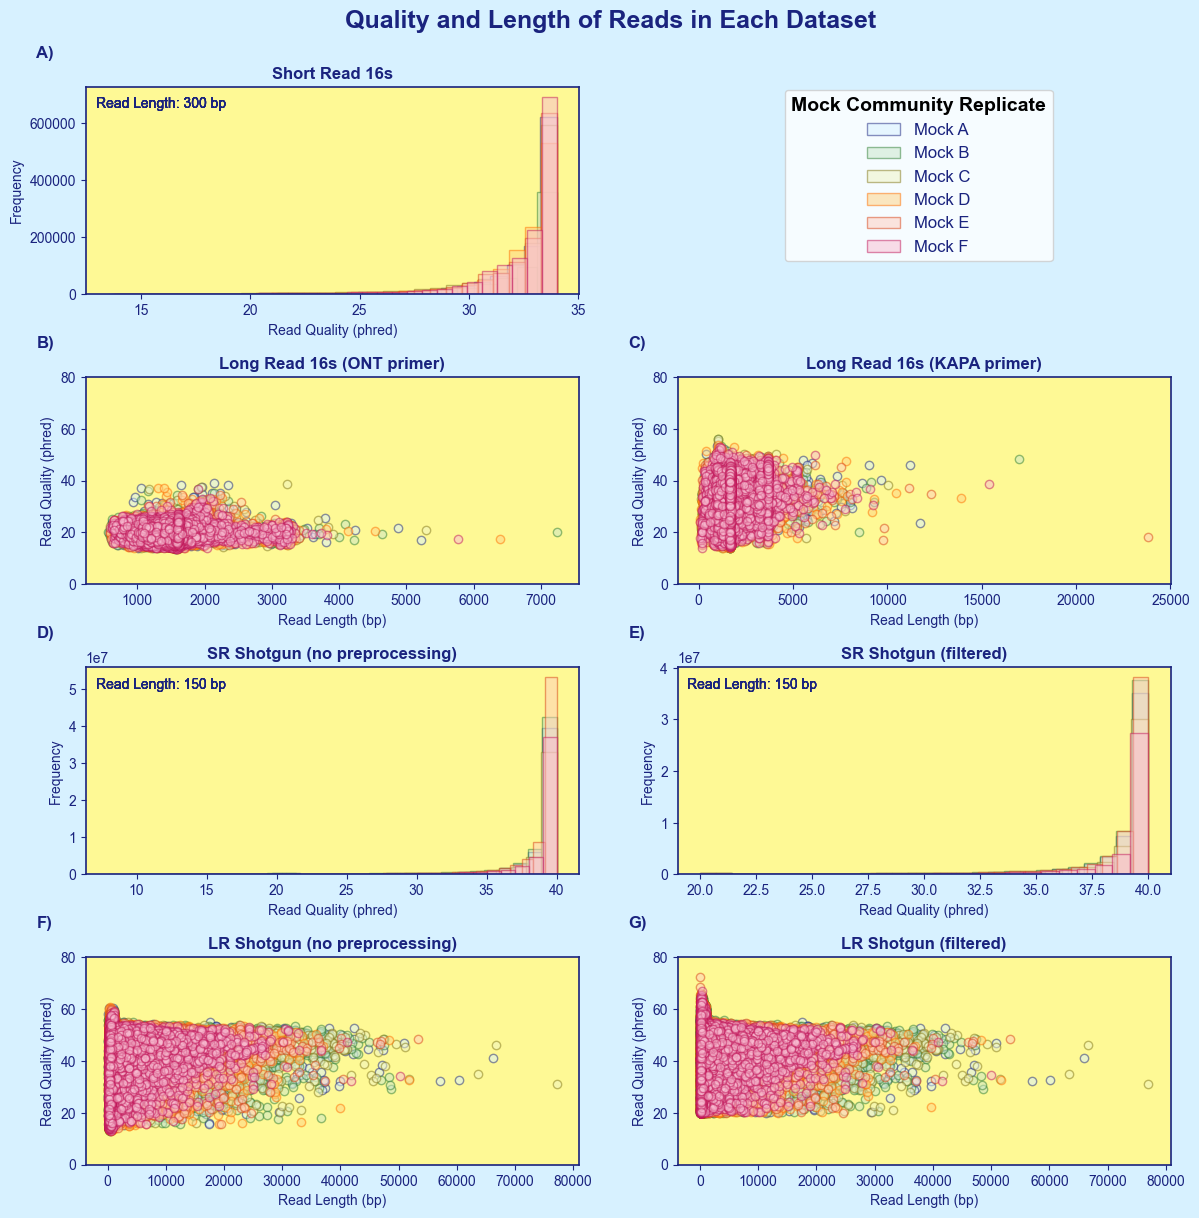

In [155]:
# reorganise the data to SR16s, LR16sONT, LR16sKAPA, nopre_SRshot, QC_SRshot, nopre_LRshot, QC_LRshot
ordered_df_list = [seq_type_ranges['SR16s'], ['blank'],
                   seq_type_ranges['LR16sONT'], seq_type_ranges['LR16sKAPA'], 
                   seq_type_ranges['nopre_SRshot'], seq_type_ranges['QC_SRshot'], 
                   seq_type_ranges['nopre_LRshot'], seq_type_ranges['QC_LRshot']]
title = 'Quality and Length of Reads in Each Dataset'
legend_labels = [['Mock A', 'Mock B', 'Mock C', 'Mock D', 'Mock E', 'Mock F'],
                 [''],
                 ['Mock A', 'Mock B', 'Mock C', 'Mock D', 'Mock E', 'Mock F'],
                 ['Mock A', 'Mock B', 'Mock C', 'Mock D', 'Mock E', 'Mock F'],
                 ['Mock A', 'Mock B', 'Mock C', 'Mock E', 'Mock F'],
                 ['Mock A', 'Mock B', 'Mock C', 'Mock E', 'Mock F'],
                 ['Mock A', 'Mock B', 'Mock C', 'Mock D', 'Mock E', 'Mock F'],
                 ['Mock A', 'Mock B', 'Mock C', 'Mock D', 'Mock E', 'Mock F']]
face_colour_map = {'Mock A': '#D7F1FF', 'Mock B': '#C8E6C9', 'Mock C': '#F0F4C3', 'Mock D': '#FFD180', 'Mock E': '#FFCCBC', 'Mock F': '#F8BBD0'}
edge_colour_map = {'Mock A': '#1A237E', 'Mock B': '#2E7D32', 'Mock C': '#827717', 'Mock D': '#FF6F00', 'Mock E': '#D84315', 'Mock F': '#C2185B'}
plot_title1 = 'Short Read 16s' # histogram
x_title1 = 'Read Quality (phred)'
y_title1 = 'Frequency'
plot_title2 = 'Long Read 16s (ONT primer)' # scatter
x_title2 = 'Read Length (bp)'
y_title2 = 'Read Quality (phred)'
plot_title3 = 'Long Read 16s (KAPA primer)' # scatter
x_title3 = 'Read Length (bp)'
y_title3 = 'Read Quality (phred)'
plot_title4 = 'SR Shotgun (no preprocessing)' # histogram
x_title4 = 'Read Quality (phred)'
y_title4 = 'Frequency'
plot_title5 = 'SR Shotgun (filtered)' # histogram
x_title5 = 'Read Quality (phred)'
y_title5 = 'Frequency'
plot_title6 = 'LR Shotgun (no preprocessing)'   # scatter
x_title6 = 'Read Length (bp)'
y_title6 = 'Read Quality (phred)'
plot_title7 = 'LR Shotgun (filtered)' # scatter
x_title7 = 'Read Length (bp)'
y_title7 = 'Read Quality (phred)'

# colours 1
background_colour = '#D7F1FF'
plot_colour = '#FEF995'
font_colour = '#1A237E'
line_colour = '#1A237E'
figure_1(ordered_df_list, title, legend_labels, face_colour_map, edge_colour_map,
             background_colour, plot_colour, font_colour, line_colour,
             plot_title1, x_title1, y_title1,
             plot_title2, x_title2, y_title2,
             plot_title3, x_title3, y_title3,
             plot_title4, x_title4, y_title4,
             plot_title5, x_title5, y_title5,
             plot_title6, x_title6, y_title6,
             plot_title7, x_title7, y_title7)

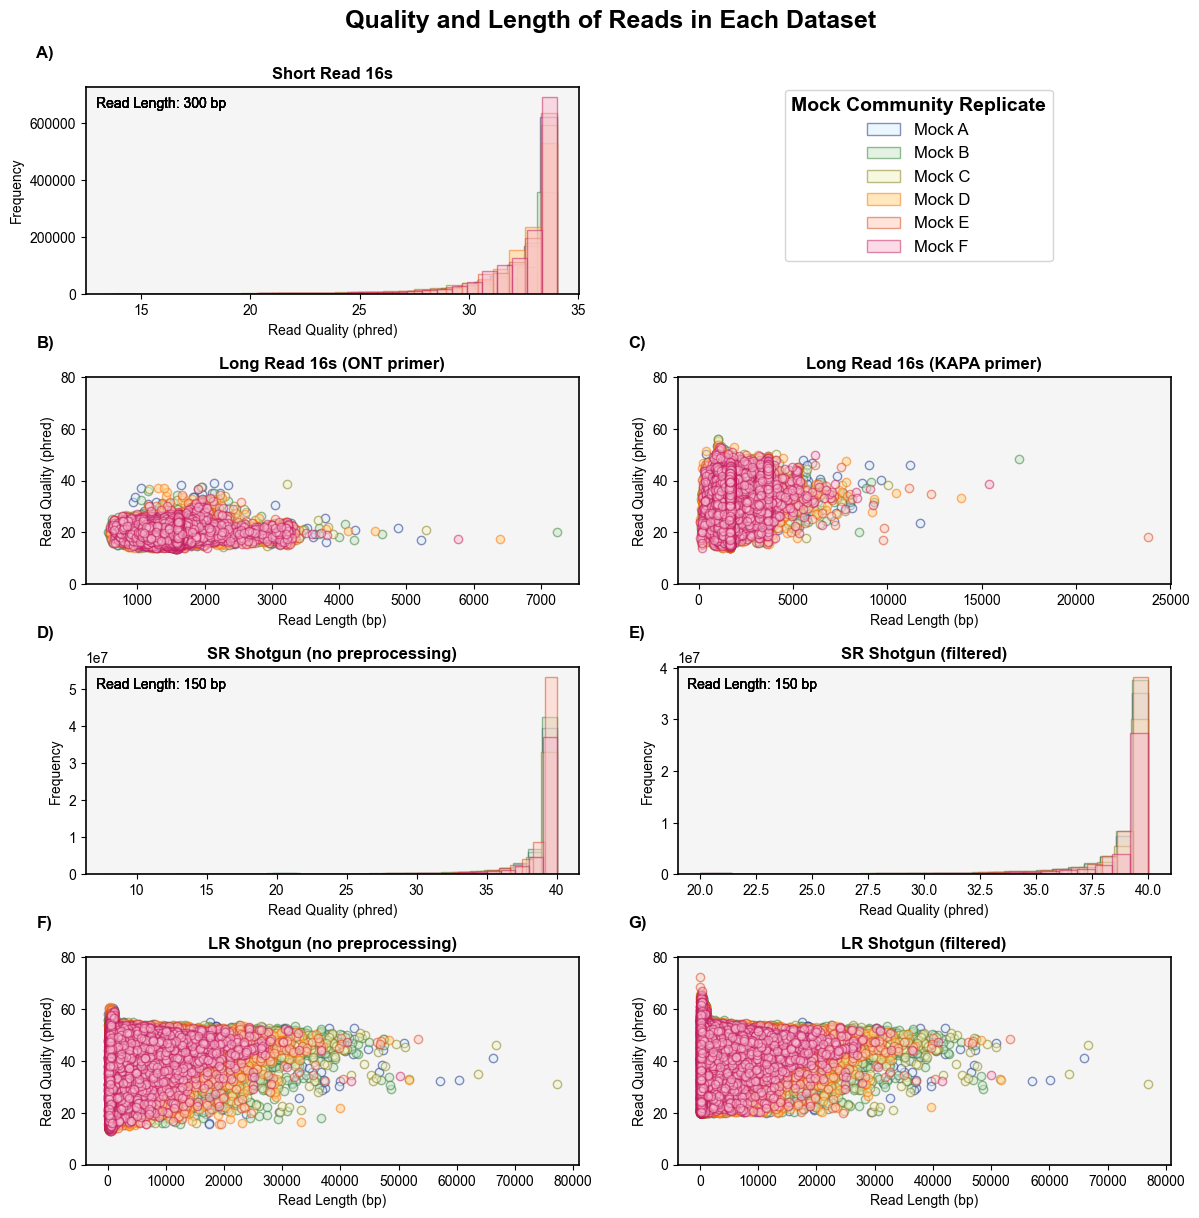

In [157]:
# colours 2
background_colour = 'none'
plot_colour = 'whitesmoke'
font_colour = 'black'
line_colour = 'black'
figure_1(ordered_df_list, title, legend_labels, face_colour_map, edge_colour_map,
             background_colour, plot_colour, font_colour, line_colour,
             plot_title1, x_title1, y_title1,
             plot_title2, x_title2, y_title2,
             plot_title3, x_title3, y_title3,
             plot_title4, x_title4, y_title4,
             plot_title5, x_title5, y_title5,
             plot_title6, x_title6, y_title6,
             plot_title7, x_title7, y_title7)

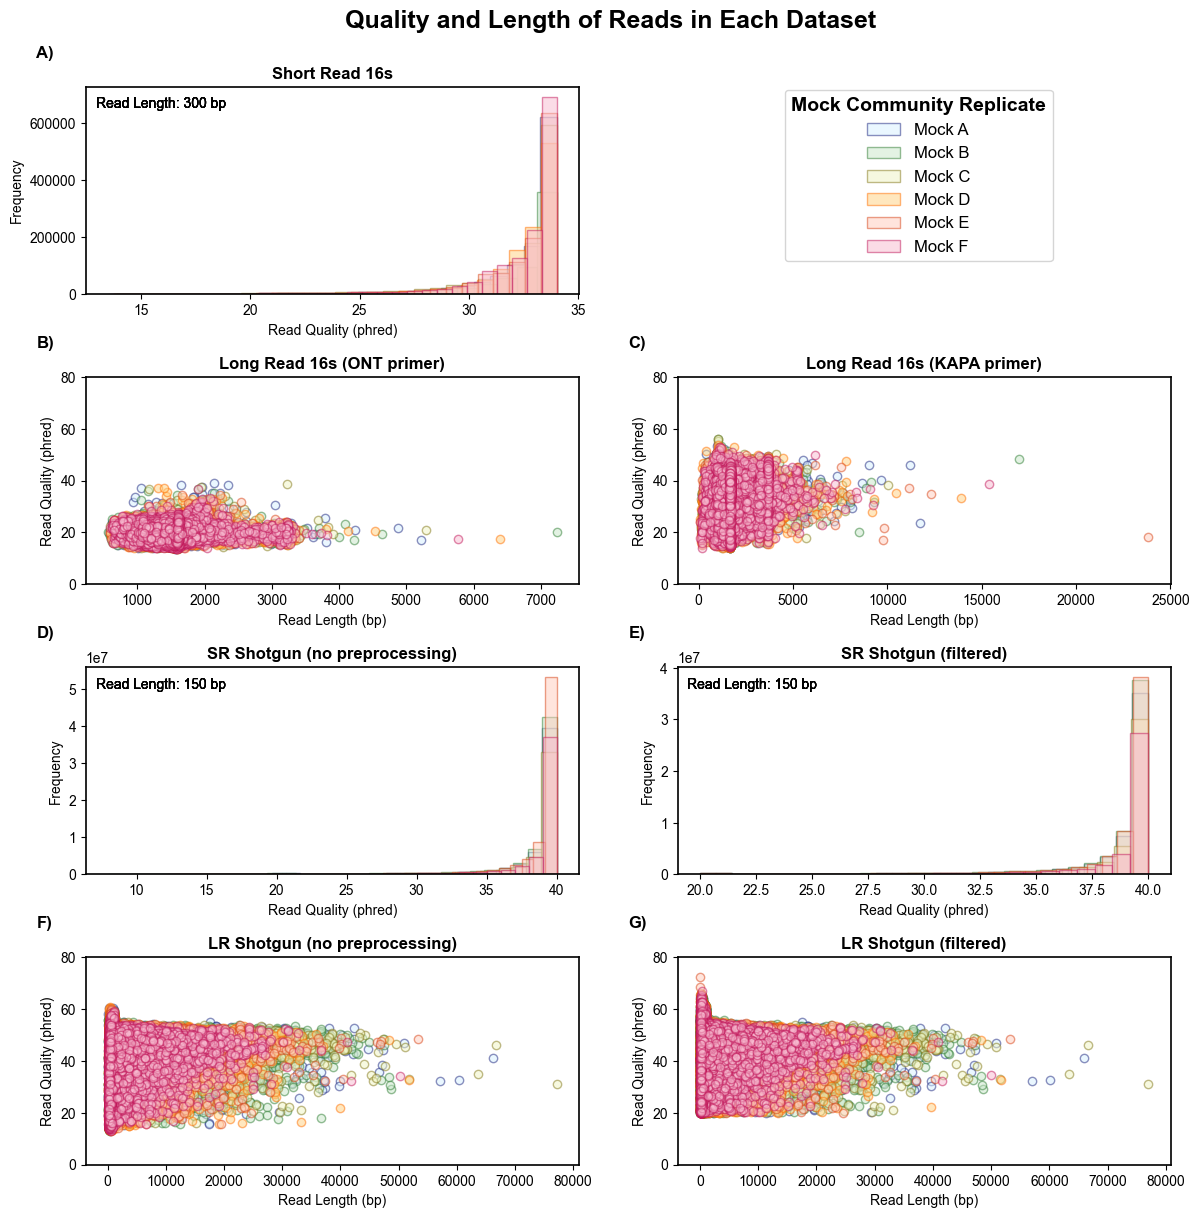

In [156]:
# colours 3
background_colour = 'none'
plot_colour = 'none'
font_colour = 'black'
line_colour = 'black'
figure_1(ordered_df_list, title, legend_labels, face_colour_map, edge_colour_map,
             background_colour, plot_colour, font_colour, line_colour,
             plot_title1, x_title1, y_title1,
             plot_title2, x_title2, y_title2,
             plot_title3, x_title3, y_title3,
             plot_title4, x_title4, y_title4,
             plot_title5, x_title5, y_title5,
             plot_title6, x_title6, y_title6,
             plot_title7, x_title7, y_title7)